### PCB PostProcessing data

In [2]:
import sys
sys.path.append('..') 

import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#### Transforming txt file in pandas DataFrame

In [7]:
path = r"C:\Users\Desi\Desktop\TesiStanford\iSENS_2024_2_19_18_54_27.txt"  # path of the txt file you want to analyze
f = open(path,"r") 
data = pd.DataFrame()
columns = ['time','DAC','Ch1','Ch2']
for i,line in enumerate(f):
    data[columns[i]] = line.split(',')

In [8]:
utils.save_xls([data], 'iSENS_2024_2_19_18_54_27','PCB_data',additional_comment= None, mode = 2)

The directory exists
C:\Users\Desi\Desktop\TesiStanford\repo\WearS\PCB\03042024-iSENS_2024_2_19_18_54_27-PCB_data


'03042024-iSENS_2024_2_19_18_54_27-PCB_data'

In [4]:
data['time'] = pd.to_datetime(data['time'])
data['DAC'] = pd.to_numeric(data['DAC'][pd.to_numeric(data['DAC'])>0])
data['Ch1'] = pd.to_numeric(data['Ch1'])/100
data['Ch2'] = pd.to_numeric(data['Ch2'])/100

#### run this cell if you want to compare PCB data with Keithley acquired data

In [14]:
path_keithley = r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\pcb-021924\r2c1-d021224.xls"
keithley = pd.read_excel(path_keithley)
keithley

WARNING *** file size (44774) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Time,DrainI,DrainV,GateI,DrainVRight
0,0.074781,0.000000e+00,-0.002284,0.000000e+00,0.375995
1,0.149138,1.000000e-08,0.428842,1.000000e-08,0.591312
2,0.182500,2.000000e-08,0.581618,2.000000e-08,0.708056
3,0.215940,3.000000e-08,0.683875,3.000000e-08,0.801450
4,0.249402,4.000000e-08,0.765617,4.000000e-08,0.879054
...,...,...,...,...,...
96,3.407138,9.600000e-07,3.868019,9.600000e-07,3.673594
97,3.440535,9.700000e-07,3.894331,9.700000e-07,3.696910
98,3.473993,9.800000e-07,3.920150,9.800000e-07,3.720321
99,3.507430,9.900000e-07,3.945815,9.900000e-07,3.743147


In [90]:
initial_offeset = keithley[(keithley["DrainI"]>=41e-9)]['DrainV'].iloc[0]-data['Ch1'][0]
print('Initial offset: ',initial_offeset' V')

0.33663664960861206

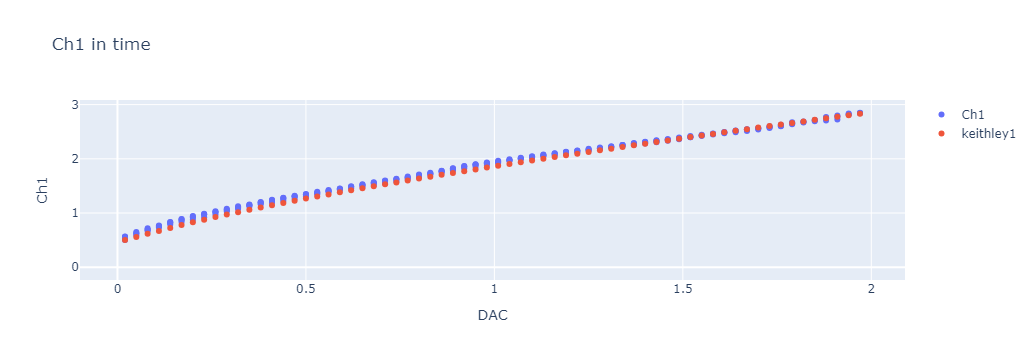

In [154]:
fig = px.scatter(data, x="DAC", y="Ch1", title='Ch1 in time')
fig.data[0].name="Ch1"
fig.update_traces(showlegend=True)
#fig.add_scatter(x=data["DAC"], y=data["Ch2"], mode='markers',name = "Ch2")
fig.add_scatter(x=data["DAC"], y=(keithley[(keithley["DrainI"]>=41e-9) & (keithley["DrainI"]<=701e-9)]["DrainV"])-initial_offset, mode='markers',name = "keithley1")
#fig.add_scatter(x=data["DAC"], y=keithley[(keithley["DrainI"]>41e-9) & (keithley["DrainI"]<701e-9)]["DrainVRight"], mode='markers',name = "keithley2")

fig.show()

In [127]:
mean_diff = np.mean(((keithley[(keithley["DrainI"]>=41e-9) & (keithley["DrainI"]<=701e-9)]["DrainV"])-np.array(data.groupby('DAC')['Ch1'].mean()))-initial_offset)
std_diff = np.std(((keithley[(keithley["DrainI"]>=41e-9) & (keithley["DrainI"]<=701e-9)]["DrainV"])-np.array(data.groupby('DAC')['Ch1'].mean()))-initial_offset)
print('Subtracting the initial offset. Diff Mean: ',mean_diff,'V. Diff Std: ', std_diff)

Mean:  -0.04516048995894619 . Std:  0.03436173364287672


In [124]:
mean_diff = np.mean((keithley[(keithley["DrainI"]>=41e-9) & (keithley["DrainI"]<=701e-9)]["DrainV"])-np.array(data.groupby('DAC')['Ch1'].mean()))
std_diff = np.std((keithley[(keithley["DrainI"]>=41e-9) & (keithley["DrainI"]<=701e-9)]["DrainV"])-np.array(data.groupby('DAC')['Ch1'].mean()))
print('Not subtracting the initial offset. Diff Mean: ',mean_diff,'. Std: ', std_diff)

Mean:  0.29147615964966583 . Std:  0.034361733642876716


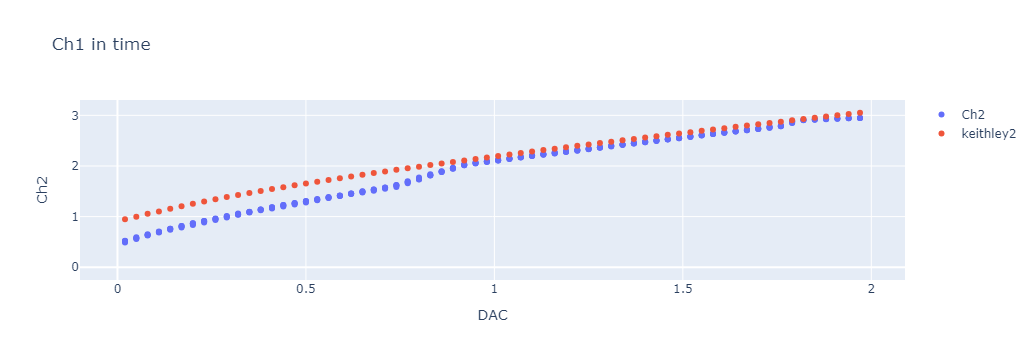

In [88]:
fig = px.scatter(data, x="DAC", y="Ch2", title='Ch1 in time')
fig.data[0].name="Ch2"
fig.update_traces(showlegend=True)
fig.add_scatter(x=data["DAC"], y=keithley[(keithley["DrainI"]>41e-9) & (keithley["DrainI"]<701e-9)]["DrainVRight"], mode='markers',name = "keithley2")

#fig.add_scatter(x=data["DAC"], y=data["Ch1"], mode='markers',name = "Ch2")
#fig.add_scatter(x=data["DAC"], y=keithley[(keithley["DrainI"]>=41e-9) & (keithley["DrainI"]<=701e-9)]["DrainV"], mode='markers',name = "keithley1")


fig.show()

Text(0, 0.5, '[V]')

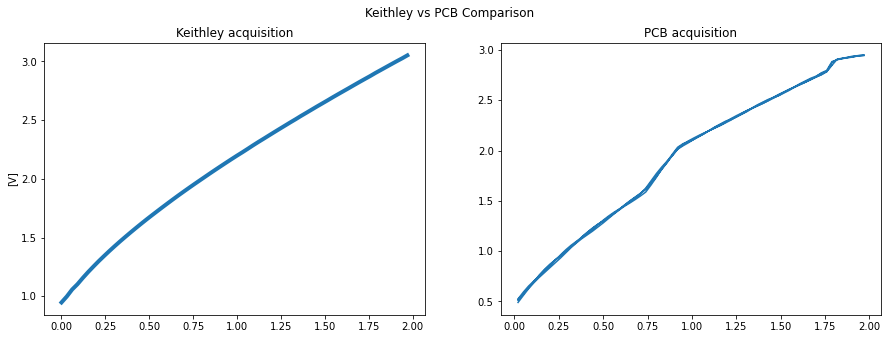

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Keithley vs PCB Comparison')
ax2.set_title('PCB acquisition')
ax1.set_title('Keithley acquisition')
ax2.plot(data['DAC'],data['Ch2'])
ax1.plot(np.arange(0,2,2/len(keithley[(keithley["DrainI"]>41e-9) & (keithley["DrainI"]<701e-9)]["DrainVRight"])),keithley[(keithley["DrainI"]>41e-9) & (keithley["DrainI"]<701e-9)]["DrainVRight"], linewidth = 4)
ax1.set_ylabel('[V]')